In [13]:
import numpy as np
import pandas as pd
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py


In [2]:
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)

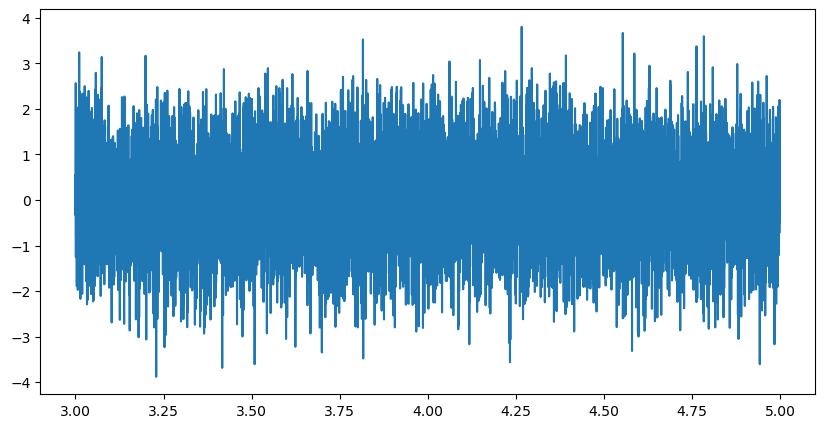

In [3]:
plt.figure(figsize = (10, 5))
plt.plot(t, X)

Мат. ожидание

In [4]:
M = np.mean(X).round(5)

def average(X):
    return (np.sum(X)/len(X)).round(5)

assert average(X) == M

In [5]:
D = np.var(X).round(5)

def var(X, M):
    return (np.sum((X - M)**2)/len(X)).round(5)

assert var(X, M) == D

In [6]:
from scipy.stats import skew

A = round(skew(X), 4)

def assim(X):
    m3 = np.sum((X - np.mean(X))**3)/len(X)
    sigm3 = np.square(np.var(X))**3
    return (m3/sigm3).round(4)

print(A, assim(X))

-0.0525 -0.0456


In [7]:
from scipy.stats import kurtosis

E = round(kurtosis(X, fisher=False, bias = False), 3)

def exx(X):
    m4 = np.sum((X - np.mean(X))**4)/len(X)
    sigm4 = np.square(np.var(X))**4
    return (m4/sigm4).round(3)

print(E, exx(X))

3.029 2.505


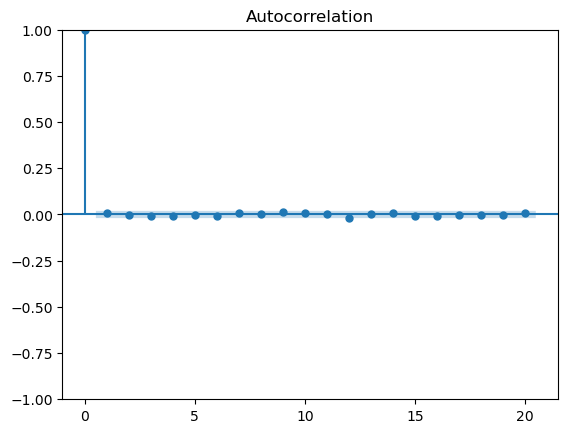

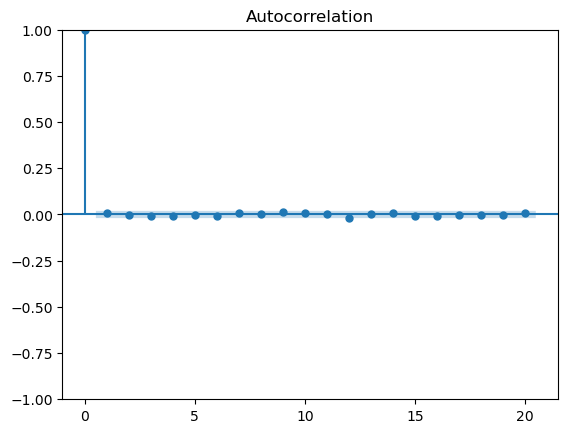

In [8]:
plot_acf(X, lags = 20)

<StemContainer object of 3 artists>

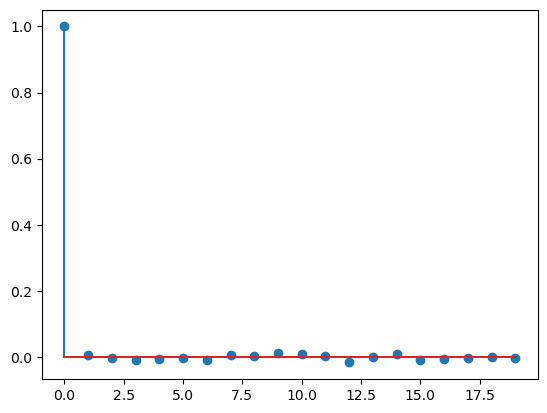

In [9]:
h = np.correlate(X, X, mode = 'full')[len(X)-1:]/len(X)/np.var(X)

plt.stem(h[:20])

In [14]:
df = pd.DataFrame(X)

<StemContainer object of 3 artists>

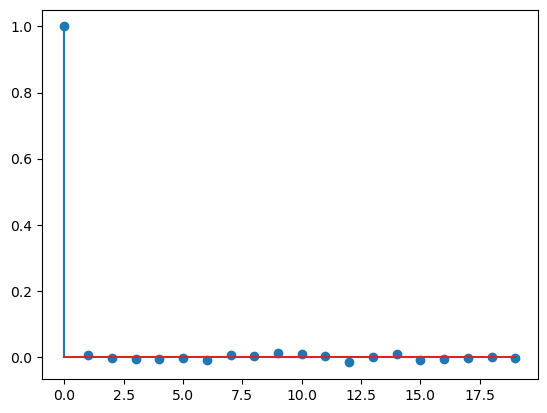

In [18]:
def acF(X):
    return [((df - df.mean())*(df.shift(i)-df.mean())).mean()/df.var() for i \
           in range (20)]
    
plt.stem(acF(df))

**Вариант 15**

In [21]:
Xmat = h5py.File('15.mat', 'r')
Xmat = Xmat.get('z15')
Xmat = np.array(Xmat)
Xmat.ravel()

array([ 0.2       ,  1.        ,  1.58433327,  1.40080979,  1.07078338,
        0.79266879,  0.63645271,  0.42124849,  0.20614961,  0.16348728,
        0.71531704,  0.9530096 ,  1.06928085,  0.5107262 ,  0.1442154 ,
       -0.082578  , -0.29682447, -0.20024906, -0.11214918,  0.41693345,
        0.74535549,  0.869539  ,  0.51847386,  0.0336383 , -0.23828917,
       -0.68480879, -0.97059543, -0.85939651, -0.60945605, -0.59659778,
       -0.38994657, -0.34635565, -0.39133945, -0.52421646, -0.50273664,
       -0.32565497, -0.46371708, -0.76557173, -0.92133862, -1.14394664,
       -0.71182485, -0.02951914,  0.48883501,  0.61669776,  0.59949732,
        0.68148718,  0.66081279,  0.6293393 ,  0.46394032,  0.33367886,
        0.05943531, -0.69253293, -1.15685023, -1.62998521, -1.09847001,
       -0.28696006,  0.49420444,  0.94153197,  1.3807353 ,  1.47642644,
        1.57197303,  1.28659522,  0.72898132,  0.26818384,  0.03823994,
       -0.21961952, -0.14940077, -0.05839446, -0.02058712, -0.07

In [25]:
Xmat = Xmat.ravel()

Вычисление количественных характеристик

In [26]:
M = np.mean(Xmat).round(5)

def average(X):
    return (np.sum(X)/len(X)).round(5)

assert average(Xmat) == M

In [27]:
D = np.var(Xmat).round(5)

def var(X, M):
    return (np.sum((X - M)**2)/len(X)).round(5)

assert var(Xmat, M) == D

In [30]:
A = round(skew(Xmat), 6)

def assim(X):
    m3 = np.sum((X - np.mean(X))**3)/len(X)
    sigm3 = np.square(np.var(X))**3
    return (m3/sigm3).round(6)

print(A, assim(Xmat))

E = round(kurtosis(Xmat, fisher=False, bias = False), 3)

def exx(X):
    m4 = np.sum((X - np.mean(X))**4)/len(X)
    sigm4 = np.square(np.var(X))**4
    return (m4/sigm4).round(3)

print(E, exx(Xmat))

0.100466 2.233056
2.571 158.793


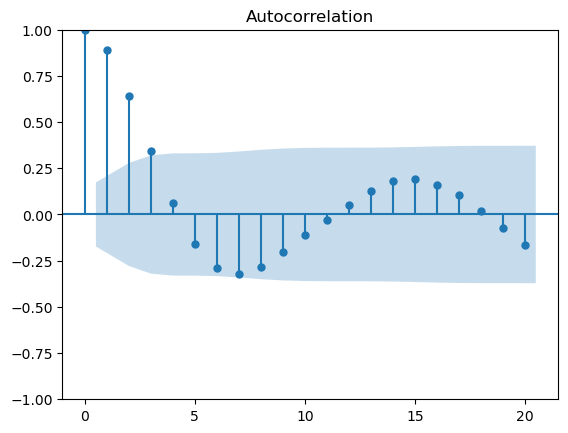

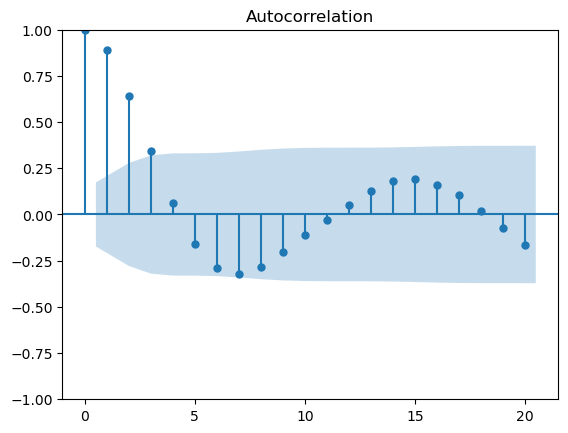

In [119]:
plot_acf(Xmat, lags = 20)

<StemContainer object of 3 artists>

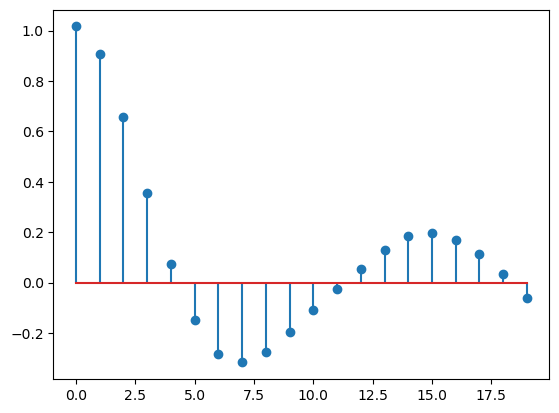

In [121]:
h1 = np.correlate(Xmat, Xmat, mode = 'full')[len(Xmat)-1:]/len(Xmat)/np.var(Xmat)

plt.stem(h1[:20])

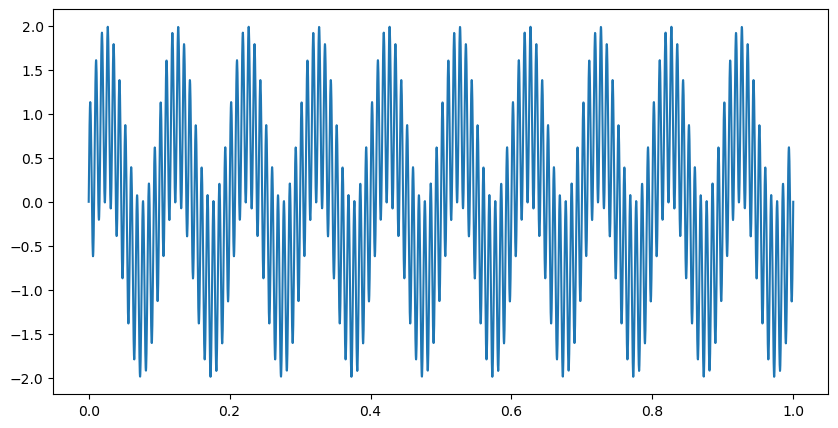

In [33]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1)
plt.show()

In [34]:
M = round(np.mean(x1), 5)

def average(X):
    return (np.sum(X)/len(X)).round(5)

assert average(x1) == M

D = round(np.var(x1), 5)

def var(X, M):
    return (np.sum((X - M)**2)/len(X)).round(5)

assert var(x1, M) == D

A = round(skew(x1), 6)

def assim(X):
    m3 = np.sum((X - np.mean(X))**3)/len(X)
    sigm3 = np.square(np.var(X))**3
    return (m3/sigm3).round(6)

print(A, assim(x1))

E = round(kurtosis(Xmat, fisher=False, bias = False), 3)

def exx(X):
    m4 = np.sum((X - np.mean(X))**4)/len(X)
    sigm4 = np.square(np.var(X))**4
    return (m4/sigm4).round(3)

print(E, exx(x1))

0.0 0.0
2.571 2.254


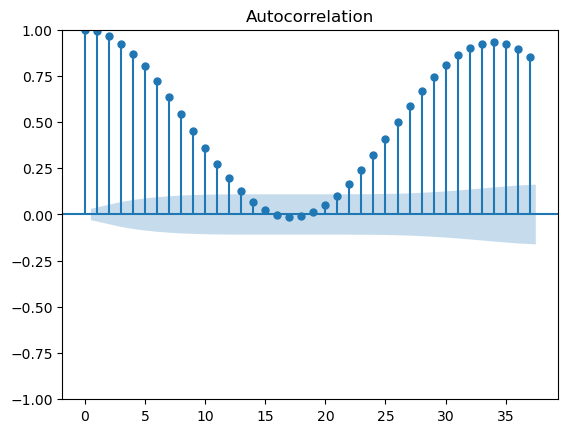

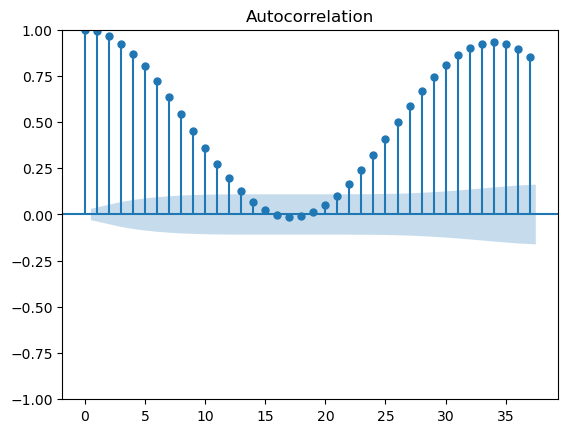

In [37]:
plot_acf(x1)

<StemContainer object of 3 artists>

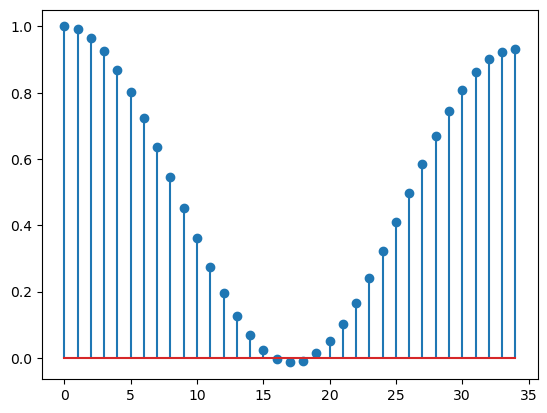

In [46]:
h1 = np.correlate(x1, x1, mode = 'full')[len(x1)-1:]/len(x1)/np.var(x1)

plt.stem(h1[:35], label = 'Autocorrelation')

17.

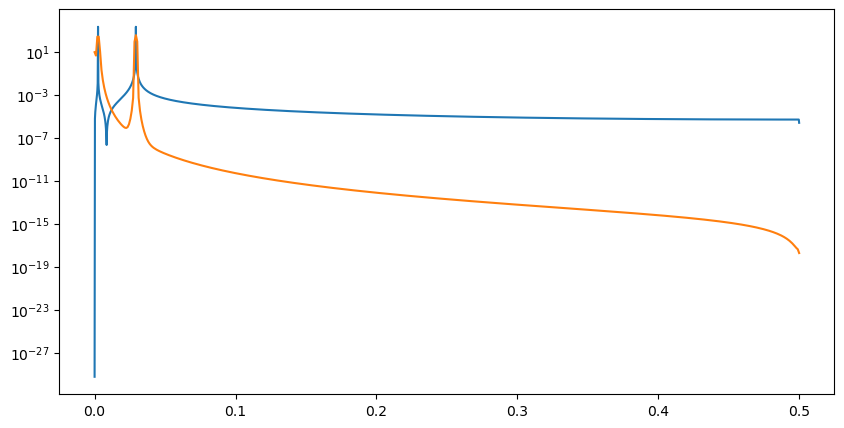

In [44]:
pd1, pdden1 = signal.periodogram(x1)
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pdw1, pddenw1)
plt.show()


18.

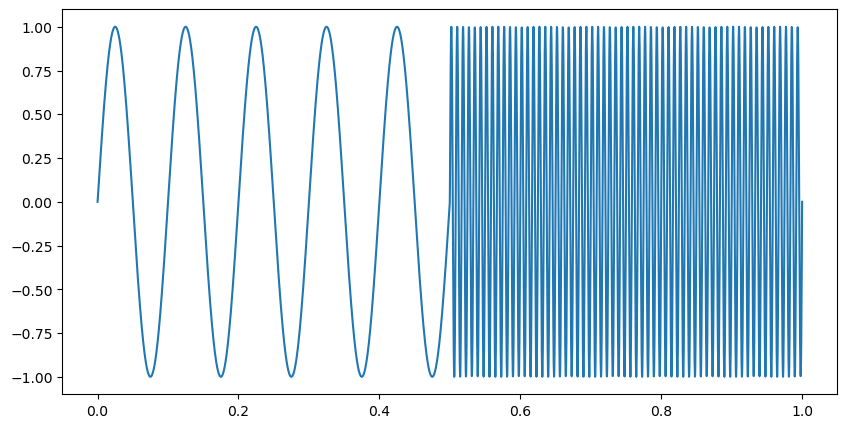

In [45]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i]) 
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
    
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

19.

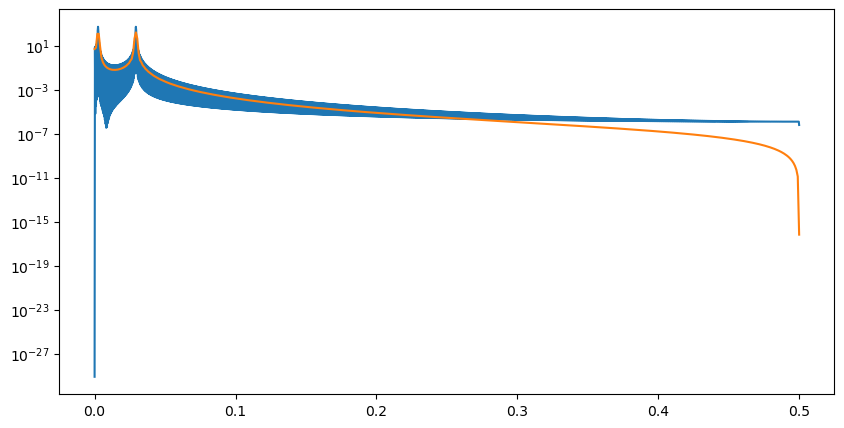

In [49]:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2)
plt.semilogy(pdw2, pddenw2)
plt.show()


20.

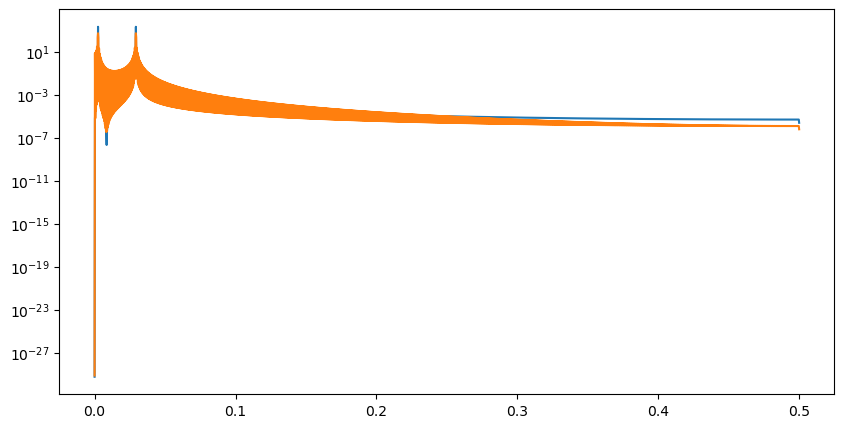

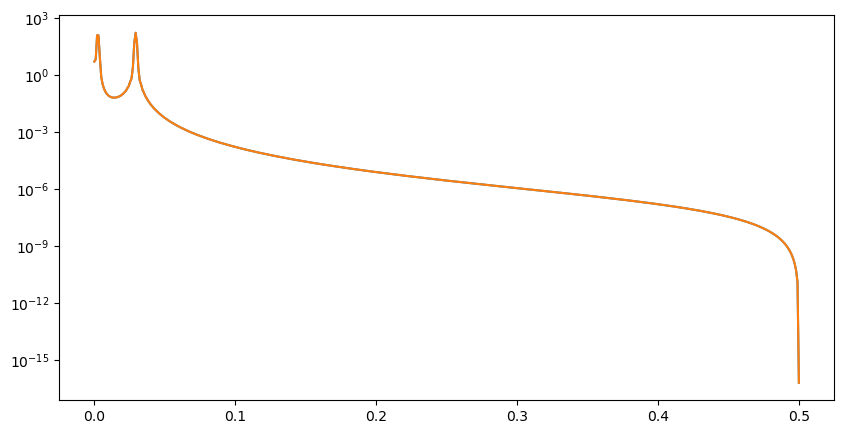

In [50]:
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pd2, pdden2)
plt.figure(figsize = (10, 5))
plt.semilogy(pdw1, pddenw1)
plt.semilogy(pdw2, pddenw2)
plt.show()


21-22.

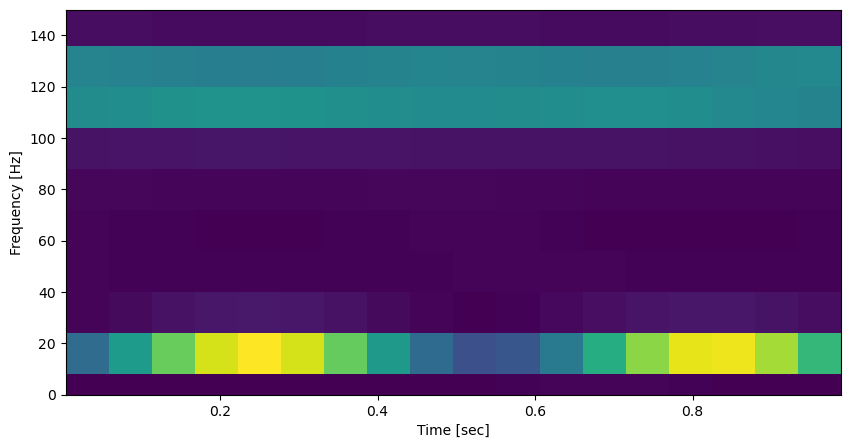

In [51]:
fs = 1/(t[1]-t[0]) 

f, tx, Sxx = signal.spectrogram(x1, fs) # возвращаем частоту от времени
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()


23.

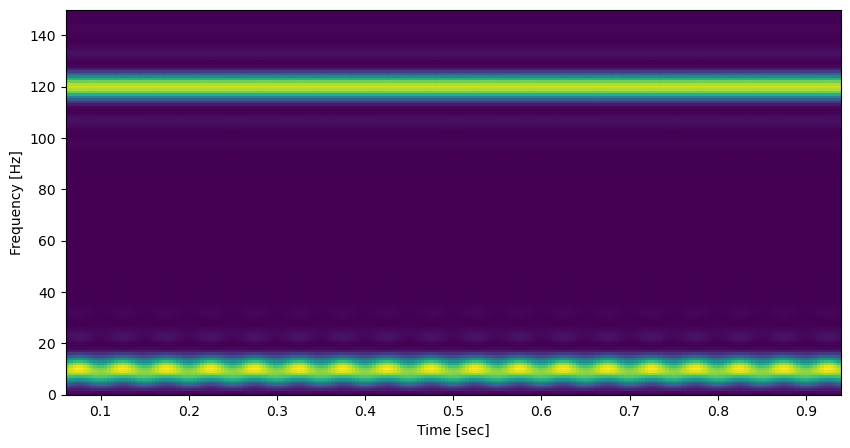

In [52]:

f, tx, Sxx = signal.spectrogram(x1, fs, nperseg = 512, noverlap = 496, nfft=4096)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

24.

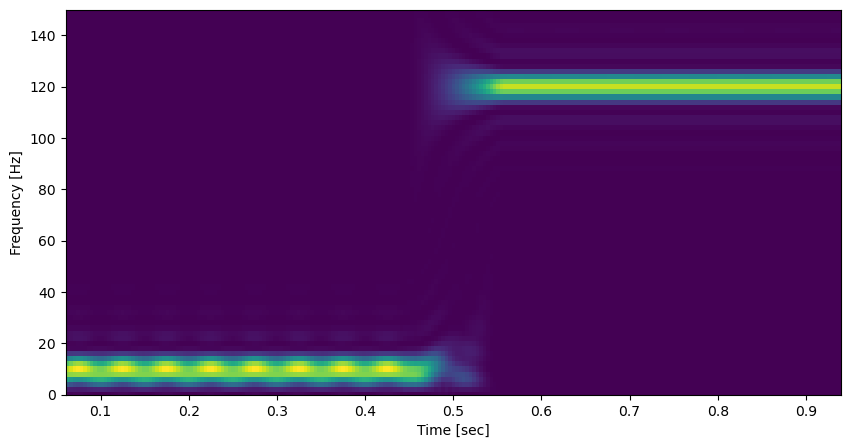

In [56]:
f, tx, Sxx = signal.spectrogram(x2, fs, nperseg = 512, noverlap = 496, nfft=2048)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

25.

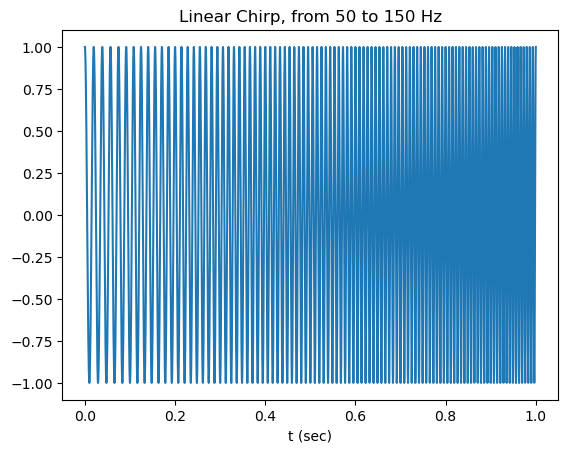

In [57]:
tx = np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear') 
# от 50 до 150 Гц за 1 секунду, ЛЧМ
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()
